# Laboratorio No. 2 - Regresión Lineal

Adjunto a este NoteBook encontrarán el archivo *Autos-csv* que contiene datos sobre automóviles de segunda mano.  El objetivo principal de este ejercicio es desarrollar un modelo que permita, en base a las características (features) que tiene el archivo, predecir el costo de un vehículo usado.

A diferencia de la mayoría de ejercicios, este archivo no ha sido depurado, es decir los datos son crudos (raw).  Esto quiere decir que antes de trabajar sobre un modelo predictivo, deben realizar el proceso total, desde limpieza de datos, exploración inicial, etc.

A continuación encontrarán que hay encabezados que bien podrían ayudarlos a desarrollar el código requerido.  Estos están a manera de sugerencia únicamente y Ustedes decidirán si los usan, modifican, eliminan, agregan a los mismos

## Importar las librerías relevantes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Cargar los datos crudos

In [2]:
raw_df = pd.read_csv('Autos.csv')

In [3]:
raw_df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


## Preprocesamiento

### Explorar las estadísticas descriptivas de las variables

In [7]:
raw_df.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


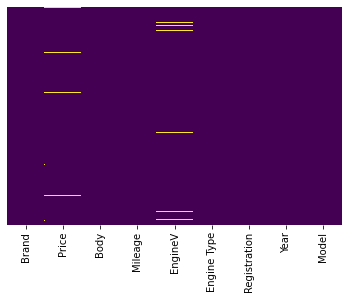

In [24]:
sns.heatmap(raw_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
raw_df['EngineV'].isna().sum()

150

In [51]:
raw_df['Price'].isna().sum()

172

In [9]:
raw_df.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'],
      dtype='object')

In [46]:
X = raw_df[['Brand','Body', 'Mileage', 'EngineV', 'Engine Type','Year']]
y = raw_df['Price']
print(X,y)

              Brand       Body  Mileage  EngineV Engine Type  Year
0               BMW      sedan      277      2.0      Petrol  1991
1     Mercedes-Benz        van      427      2.9      Diesel  1999
2     Mercedes-Benz      sedan      358      5.0         Gas  2003
3              Audi  crossover      240      4.2      Petrol  2007
4            Toyota  crossover      120      2.0      Petrol  2011
...             ...        ...      ...      ...         ...   ...
4340  Mercedes-Benz      sedan        9      3.0      Diesel  2014
4341            BMW      sedan        1      3.5      Petrol  1999
4342            BMW      sedan      194      2.0      Petrol  1985
4343         Toyota      sedan       31      NaN      Petrol  2014
4344     Volkswagen        van      124      2.0      Diesel  2013

[4345 rows x 6 columns] 0         4200.0
1         7900.0
2        13300.0
3        23000.0
4        18300.0
          ...   
4340    125000.0
4341      6500.0
4342      8000.0
4343     14200.0
4

### Manejo de valores faltantes

In [56]:
# se les pone el precio promedio
def imputar_precios(cols):
    precio = cols[0]
    
    if pd.isnull(precio):
            return 19418.74
    else:
        return precio

In [57]:
# se les pone el precio promedio
def imputar_enginev(cols):
    enginev = cols[0]
    
    if pd.isnull(enginev):
            return 2.79
    else:
        return enginev

In [58]:
raw_df['Price'] = raw_df[['Price']].apply(imputar_precios,axis=1) #axis 1 es columnas

In [59]:
raw_df['EngineV'] = raw_df[['EngineV']].apply(imputar_enginev,axis=1) #axis 1 es columnas

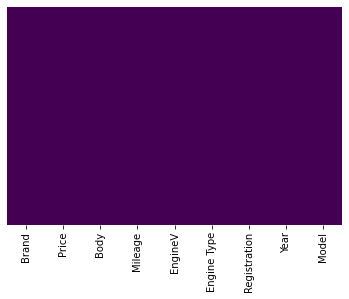

In [60]:
sns.heatmap(raw_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Exploración de las Funciones de Distribución de Probabilidades (PDFs por sus siglas en inglés)

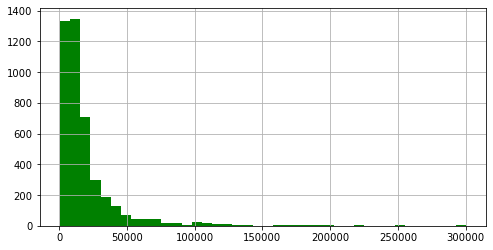

In [61]:
raw_df['Price'].hist(color='green',bins=40,figsize=(8,4))

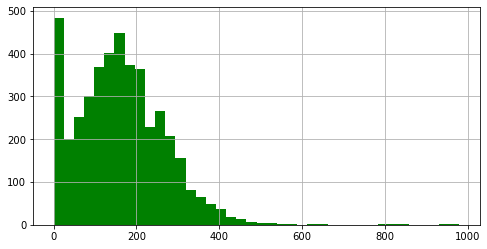

In [62]:
raw_df['Mileage'].hist(color='green',bins=40,figsize=(8,4))
#Descartada por su distribucion

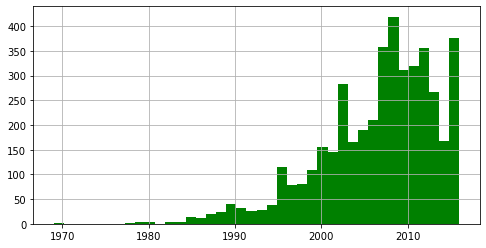

In [63]:
raw_df['Year'].hist(color='green',bins=40,figsize=(8,4))
#Descartada por su distribucion

### Manejo de valores atípicos (outliers)

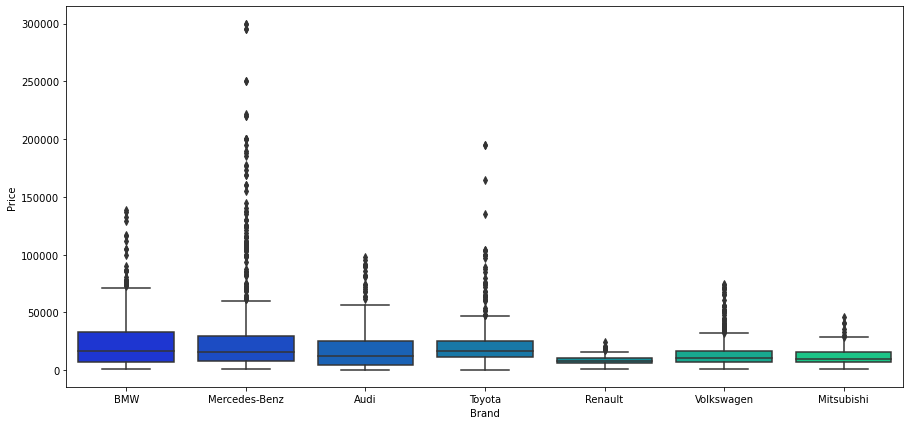

In [64]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Brand',y='Price',data=raw_df,palette='winter')

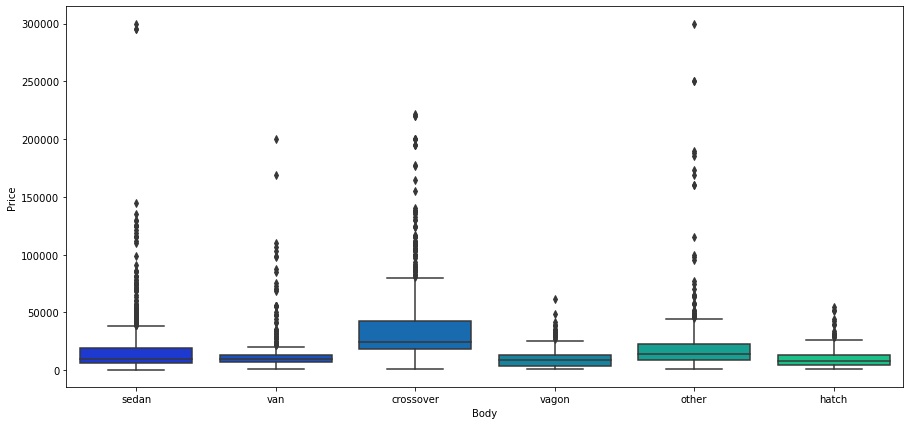

In [66]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Body',y='Price',data=raw_df,palette='winter')

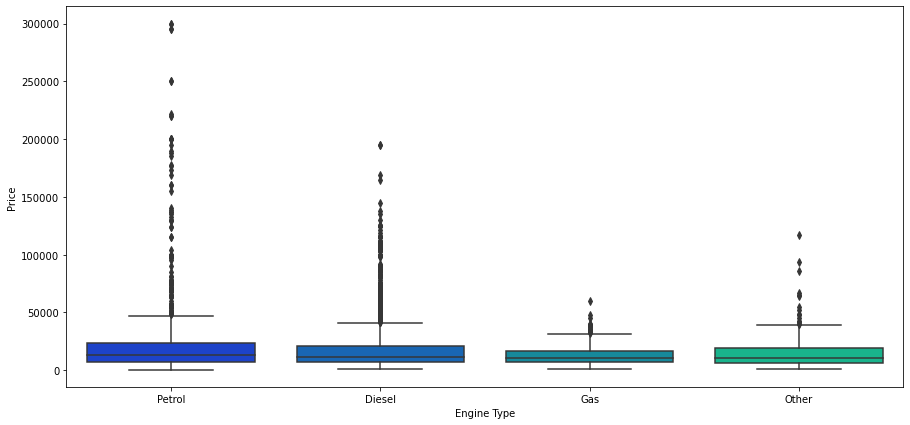

In [65]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Engine Type',y='Price',data=raw_df,palette='winter')

## Revisando los supuestos para OLS

In [156]:
import statsmodels.api as sm
y = raw_df['Price']
x1 = raw_df[['Mileage', 'EngineV', 'Year']]
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     515.5
Date:                Fri, 06 Aug 2021   Prob (F-statistic):          1.47e-286
Time:                        21:51:35   Log-Likelihood:                -49516.
No. Observations:                4345   AIC:                         9.904e+04
Df Residuals:                    4341   BIC:                         9.906e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.323e+06   1.32e+05    -17.637      0.000   -2.58e+06   -2.06e+06
Mileage      -57.6787      4.157    -13.874      0.000     -65.829     -49.528
EngineV      339.7512     65.657      5.175      0.000     211.030     468.472
Year        1171.3927     65.406     17.910      0.000    1043.164    1299.622
==============================================================================
Omnibus:                     4351.052   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           292043.871
Skew:                           4.847   Prob(JB):                         0.00
Kurtosis:                      41.976   Cond. No.                     8.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Relajamiento de los supuestos

### Multicolinealidad

In [157]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [162]:
X = raw_df[['Mileage', 'EngineV', 'Year']]
calc_vif(X)

,variables,VIF
0,Mileage,3.306104
1,EngineV,1.314829
2,Year,3.583166


## Crear variables comodín (Dummy)

In [67]:
marca = pd.get_dummies(raw_df['Brand'], drop_first=True)
marca

,BMW,Mercedes-Benz,Mitsubishi,Renault,Toyota,Volkswagen
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
4340,0,1,0,0,0,0
4341,1,0,0,0,0,0
4342,1,0,0,0,0,0
4343,0,0,0,0,1,0


In [68]:
tipo = pd.get_dummies(raw_df['Body'], drop_first=True)
tipo

,hatch,other,sedan,vagon,van
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
4340,0,0,1,0,0
4341,0,0,1,0,0
4342,0,0,1,0,0
4343,0,0,1,0,0


In [69]:
combustible = pd.get_dummies(raw_df['Engine Type'], drop_first=True)
combustible

,Gas,Other,Petrol
0,0,0,1
1,0,0,0
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
4340,0,0,0
4341,0,0,1
4342,0,0,1
4343,0,0,1


### Re-ordenar un poco

In [75]:
train = pd.concat([raw_df,marca,tipo,combustible],axis=1) #le agregamos las columnas dummies que creamos antes
train.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,BMW,...,Toyota,Volkswagen,hatch,other,sedan,vagon,van,Gas,Other,Petrol
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,1,...,0,0,0,0,1,0,0,0,0,1
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,0,...,0,0,0,0,0,0,1,0,0,0
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,0,...,0,0,0,0,1,0,0,1,0,0
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,0,...,0,0,0,0,0,0,0,0,0,1
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,0,...,1,0,0,0,0,0,0,0,0,1


In [76]:
train.columns 

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'BMW', 'Mercedes-Benz', 'Mitsubishi',
       'Renault', 'Toyota', 'Volkswagen', 'hatch', 'other', 'sedan', 'vagon',
       'van', 'Gas', 'Other', 'Petrol'],
      dtype='object')

## Modelo de regresión lineal

### Declarar las entradas y las metas

In [124]:
#X = raw_df[['Brand','Body', 'Mileage', 'EngineV', 'Engine Type','Year']]
X = train[['Mileage', 'EngineV','Year', 'BMW', 'Mercedes-Benz', 'Mitsubishi',
       'Renault', 'Toyota', 'Volkswagen', 'hatch', 'other', 'sedan', 'vagon',
       'van', 'Gas', 'Other', 'Petrol']]
#X = train[['Mileage', 'EngineV','Year']]
y = train['Price']
print(X,y)

      Mileage  EngineV  Year  BMW  Mercedes-Benz  Mitsubishi  Renault  Toyota  \
0         277     2.00  1991    1              0           0        0       0   
1         427     2.90  1999    0              1           0        0       0   
2         358     5.00  2003    0              1           0        0       0   
3         240     4.20  2007    0              0           0        0       0   
4         120     2.00  2011    0              0           0        0       1   
...       ...      ...   ...  ...            ...         ...      ...     ...   
4340        9     3.00  2014    0              1           0        0       0   
4341        1     3.50  1999    1              0           0        0       0   
4342      194     2.00  1985    1              0           0        0       0   
4343       31     2.79  2014    0              0           0        0       1   
4344      124     2.00  2013    0              0           0        0       0   

      Volkswagen  hatch  ot

### Escalar (poner a escala) los datos

In [125]:
from sklearn.preprocessing import StandardScaler
escalador = StandardScaler()
escalador.fit(X)
cols_std = escalador.transform(X)
print(cols_std)

[[ 1.09526670e+00 -1.58852704e-01 -2.31457407e+00 ... -4.05283964e-01
  -1.91690915e-01  1.33680327e+00]
 [ 2.51446288e+00  2.19564923e-02 -1.12380082e+00 ... -4.05283964e-01
  -1.91690915e-01 -7.48053228e-01]
 [ 1.86163264e+00  4.43844617e-01 -5.28414194e-01 ...  2.46740579e+00
  -1.91690915e-01 -7.48053228e-01]
 ...
 [ 3.09978142e-01 -1.58852704e-01 -3.20765401e+00 ... -4.05283964e-01
  -1.91690915e-01  1.33680327e+00]
 [-1.23221505e+00 -1.42409494e-04  1.10889902e+00 ... -4.05283964e-01
  -1.91690915e-01  1.33680327e+00]
 [-3.52313412e-01 -1.58852704e-01  9.60052368e-01 ... -4.05283964e-01
  -1.91690915e-01 -7.48053228e-01]]


In [126]:
type(cols_std)

numpy.ndarray

In [127]:
df_std = pd.DataFrame(cols_std, columns=X.columns)
df_std.head()

,Mileage,EngineV,Year,BMW,Mercedes-Benz,Mitsubishi,Renault,Toyota,Volkswagen,hatch,other,sedan,vagon,van,Gas,Other,Petrol
0,1.095267,-0.158853,-2.314574,2.293645,-0.518636,-0.285278,-0.347852,-0.377119,-0.523992,-0.264947,-0.332694,1.278644,-0.319301,-0.428863,-0.405284,-0.191691,1.336803
1,2.514463,0.021956,-1.123801,-0.435987,1.928133,-0.285278,-0.347852,-0.377119,-0.523992,-0.264947,-0.332694,-0.782079,-0.319301,2.331745,-0.405284,-0.191691,-0.748053
2,1.861633,0.443845,-0.528414,-0.435987,1.928133,-0.285278,-0.347852,-0.377119,-0.523992,-0.264947,-0.332694,1.278644,-0.319301,-0.428863,2.467406,-0.191691,-0.748053
3,0.745198,0.283125,0.066972,-0.435987,-0.518636,-0.285278,-0.347852,-0.377119,-0.523992,-0.264947,-0.332694,-0.782079,-0.319301,-0.428863,-0.405284,-0.191691,1.336803
4,-0.390159,-0.158853,0.662359,-0.435987,-0.518636,-0.285278,-0.347852,2.651683,-0.523992,-0.264947,-0.332694,-0.782079,-0.319301,-0.428863,-0.405284,-0.191691,1.336803


### Divisón del df completo en datos de entrenamiento y de prueba (Train Test Split)

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    train['Price'], test_size=0.30, 
                                                    random_state=101)
# X son todos menos price y Y es solo la columna price

### Crear la regresión

In [129]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [130]:
predicciones = lm.predict(X_test)

### Encontrar R^2 del modelo

In [137]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predicciones)
print(r2)

0.4137950012065029


Nótese que este no es el R^2 ajustado.  En otras palabras hay que encontrar el R^2 ajustado para tener una medida más adecuada

### Fórmula para R^2 Ajustado

$R^2_{ajust.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

n = número de observaciones

p = número de predictores

In [138]:
p = len(predicciones)
n = X.shape[1]
r2_ajustado = 1 - (1-r2)*((n-1)/(n-p-1))
print(r2_ajustado)

1.0072820496744535


### Encontrar los pesos (coeficientes) y el sesgo (intercepto)

In [131]:
coeficientes = pd.DataFrame(lm.coef_, X.columns, columns=['Coeficiente'])
coeficientes

,Coeficiente
Mileage,-56.643555
EngineV,194.888289
Year,1092.647077
BMW,2095.907078
Mercedes-Benz,9280.640191
Mitsubishi,-13883.001404
Renault,-12790.674806
Toyota,-6226.865684
Volkswagen,-6086.931999
hatch,-16142.367741


In [132]:
# imprimir la intercepción (constante)
print(lm.intercept_)

-2152234.5639137123


## Prueba del modelo

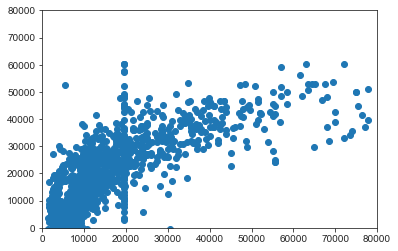

In [155]:
plt.xlim(0, 80000)
plt.ylim(0, 80000)
plt.scatter(y_test,predicciones)

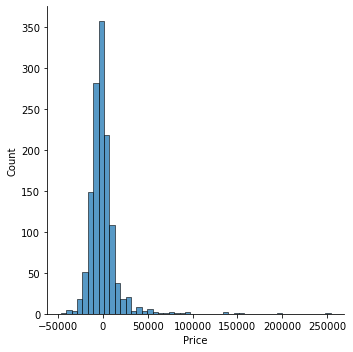

In [134]:
sns.displot((y_test - predicciones),bins=50);

In [135]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predicciones))
print('MSE:', metrics.mean_squared_error(y_test, predicciones))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicciones)))

MAE: 9885.992980160676
MSE: 329660208.08858
RMSE: 18156.547251296983


### Conclusiones


- La marca, el tipo, el millaje, los cilindros, el tipo de combustible y año son factores que afectan linealmente el precio de un carro

- El año y millaje son variables con alta multicolinealidad por lo que el valor de una tiene impacto en la otra 

- Al evaluar las métricas de errores para la regresión lineal se determinó que estas se encuentran dentro del estándar y por lo tanto se realizó correctamente el training de la data y posteriormente la predicción